In [1]:
import numpy as np
import gmsh
import porepy as pp 

* Given a grid, plot it
* Definer en sekvens av domener i 2d
* Varier gitter parametre
* Potensielt eksperimenter med ulike varianter av en algoritme eller komponent.

In [2]:
def fracture_generator(ind: int) -> list[pp.LineFracture]:
    match ind:
        case 0:
            # Isolated fracture.
            return [pp.LineFracture(np.array([[0.1, 0.3], [0.1, 0.3]]))]
        case 1:
            # Fracture that crosses the domain.
            return [pp.LineFracture(np.array([[-0.2, 0.2], [0.5, 0.5]]))]
        case 2:
            # Fracture that is close to the boundary.
            return [pp.LineFracture(np.array([[0.5, 0.5], [0.8, 0.97]]))]
        case 3:
            # Short fracture.
            return [pp.LineFracture(np.array([[0.2, 0.2], [0.35, 0.40]]))]
        case 4:
            # Fractures crossing in a nice angle.
            return [
                pp.LineFracture(np.array([[0.7, 0.9], [0.2, 0.2]])),
                pp.LineFracture(np.array([[0.8, 0.8], [0.1, 0.3]])),
            ]
        case 5:
            # Fractures crossing in a small angle.
            return [
                pp.LineFracture(np.array([[0.7, 0.9], [0.4, 0.4]])),
                pp.LineFracture(np.array([[0.7, 0.9], [0.38, 0.42]])),
            ]
        case 6:
            # Parallell fractures
            return [
                pp.LineFracture(np.array([[0.7, 0.9], [0.59, 0.59]])),
                pp.LineFracture(np.array([[0.7, 0.9], [0.61, 0.61]])),
            ]
        case 7: 
            # Almost parallel fractures.
            return [
                pp.LineFracture(np.array([[0.6, 0.95], [0.79, 0.79]])),
                pp.LineFracture(np.array([[0.75, 0.85], [0.81, 0.815]])),
            ]
        case 8:
            # Almost a T-intersection.
            return [
                pp.LineFracture(np.array([[0.5, 0.5], [0.61, 0.7]])),
                pp.LineFracture(np.array([[0.4, 0.6], [0.6, 0.6]])),
            ]
        case 9:
            # A T-intersection.
            return [
                pp.LineFracture(np.array([[0.5, 0.5], [0.45, 0.55]])),
                pp.LineFracture(np.array([[0.4, 0.6], [0.45, 0.45]])),
            ]
        case 10:
            # X-intersection which is almost a T-intersection.
            return [
                pp.LineFracture(np.array([[0.5, 0.5], [0.34, 0.40]])),
                pp.LineFracture(np.array([[0.4, 0.6], [0.35, 0.35]])),
            ]
        case 11:
            # Three almost parallel fractures, but with little overlap.
            return [
                pp.LineFracture(np.array([[0.2, 0.4], [0.1, 0.1]])),
                pp.LineFracture(np.array([[0.38, 0.50], [0.12, 0.12]])),
                pp.LineFracture(np.array([[0.47, 0.70], [0.1, 0.1]])),
            ]
        case 12:
            # Fracture almost hitting the boundary, orthorgonal to the boundary segment.
            return [pp.LineFracture(np.array([[0.01, 0.10], [0.2, 0.2]]))]
        case 13:
            # Fracture parallel to boundary, very close.
            return [pp.LineFracture(np.array([[0.7, 0.9], [0.03, 0.03]]))]
        case 14:
            # Almost L-type intersection.
            return [pp.LineFracture(np.array([[0.1, 0.25], [0.62, 0.62]])),
                    pp.LineFracture(np.array([[0.24, 0.24], [0.64, 0.75]]))]
        case _:
            raise ValueError("Invalid fracture index")

In [1]:
gmsh.clear()
gmsh.finalize()
gmsh.initialize()
fractures = [f for i in range(15) for f in fracture_generator(i)]
# fractures = fracture_generator(1)
network = pp.create_fracture_network(fractures, domain=pp.domains.nd_cube_domain(2, 1))
mesh_size = {"mesh_size_frac": 0.05, "mesh_size_bound": 0.1}
mdg = network.mesh(mesh_args=mesh_size)
print(mdg)

pp.plot_grid(mdg, figsize=(10, 8), linewidth=0.2, plot_2d=True)


NameError: name 'gmsh' is not defined

Info    : Writing 'gmsh_frac_file.geo_unrolled'...                                                                                  
Info    : Done writing 'gmsh_frac_file.geo_unrolled'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 20%] Meshing curve 25 (Line)
Info    : [ 20%] Meshing curve 26 (Line)
Info    : [ 20%] Meshing curve 27 (Line)
Info    : [ 30%] Meshing curve 28 (Line)
Info    : [ 30%] Meshing curve 29 (Line)
Info    : [ 30%] Meshing curve 30 (Line)
Info    : [ 30%] Meshing curve 31 (Line)
Info    : [ 30%] Meshing curve 32 (Line)
Info    : [ 30%] Meshing curve 33 (Line)
Info    : [ 40%] Meshing curve 34 (Line)
Info    : [ 40%] Meshing curve 35 (Line)
Info    : [

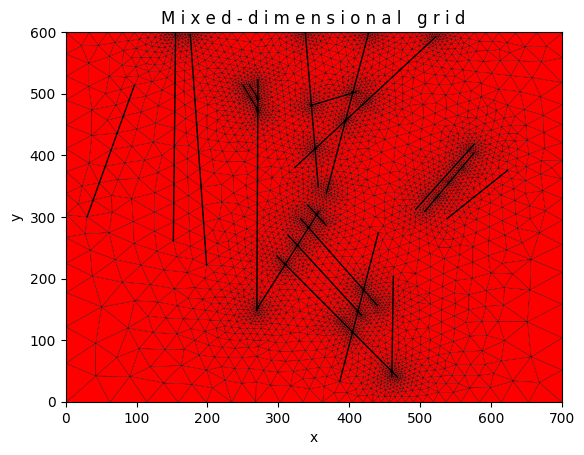

In [6]:
fractures = pp.fracture_sets.benchmark_2d_case_4()[:20]
domain = pp.Domain({"xmin": 0, "xmax": 700, "ymin": 0, "ymax": 600})
network = pp.create_fracture_network(
    fractures, domain=domain
)
mesh_size = {"mesh_size_frac": 30.0, "mesh_size_bound": 100.0}
mdg = network.mesh(mesh_args=mesh_size)
print(mdg)
pp.plot_grid(mdg, figsize=(10, 8), linewidth=0.2, plot_2d=True)

[Points: 
 [[269.611206  356.9240112]
  [152.05243   310.14123  ]]
 Center: 
 [313.2676086 231.09683  ]
 Normal: 
 [[ 0.48346528]
  [-0.87536354]],
 Points: 
 [[249.5117187 272.218872 ]
  [514.99078   470.97082  ]]
 Center: 
 [260.86529535 492.9808    ]
 Normal: 
 [[0.45843843]
  [0.88872617]],
 Points: 
 [[258.3590698 271.9851684]
  [515.57458   490.9682   ]]
 Center: 
 [265.1721191 503.27139  ]
 Normal: 
 [[0.48444404]
  [0.87482225]],
 Points: 
 [[270.6622924 269.1347046]
  [524.70264   147.78143  ]]
 Center: 
 [269.8984985 336.242035 ]
 Normal: 
 [[-0.00405277]
  [ 0.99999179]],
 Points: 
 [[355.8302002  337.58107332]
  [348.4798     600.        ]]
 Center: 
 [346.70563676 474.2399    ]
 Normal: 
 [[-0.07236509]
  [-0.99737821]],
 Points: 
 [[366.9730835  426.91851417]
  [338.13299    600.        ]]
 Center: 
 [396.94579884 469.066495  ]
 Normal: 
 [[ 0.22314358]
  [-0.97478559]],
 Points: 
 [[198.237915  175.1561889]
  [222.72442   597.60303  ]]
 Center: 
 [186.69705195 410.163725